In [1]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/home/sebastian/anaconda3/lib/python3.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/home/sebastian/anaconda3/lib/python3.7/site-packages/javabridge/jars/runnablequeue.jar', '/home/sebastian/anaconda3/lib/python3.7/site-packages/javabridge/jars/cpython.jar', '/home/sebastian/anaconda3/lib/python3.7/site-packages/weka/lib/weka.jar', '/home/sebastian/anaconda3/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [23]:
from weka.core.converters import Loader
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from weka.core.classes import Random

In [3]:
loader = Loader(classname="weka.core.converters.ArffLoader")

In [4]:
def measures(wisdom):
    dct={}
    full_wisdom=wisdom["True positive"]+wisdom["True negative"]+wisdom["False positive"]+wisdom["False negative"]
    dct['Accuracy']=(wisdom["True positive"]+wisdom["True negative"])/full_wisdom
    dct['Precision']=wisdom["True positive"]/(wisdom["True positive"]+wisdom["False positive"])
    dct['Recall']=wisdom["True positive"]/(wisdom["True positive"]+wisdom["False negative"])
    dct['Specifity']=wisdom["True negative"]/(wisdom["True negative"]+wisdom["False positive"])
    dct['F1']=2*dct['Recall']*dct['Precision']/(dct['Precision']+dct['Recall'])
    
    dct['Balanced Accuracy']=(dct['Recall']+dct['Specifity'])/2
    return dct

In [5]:
def show_all(lst):
    for i, x in enumerate(lst):
        if (type(x)==type(1.2)):
            print (f'{x:.4f}', end='')
        else:
            print (f'{x}', end='')
        if (i!=len(lst)-1):
            print (' & ', end='')
    print('\\\\ \\hline')

def create_tex_table(data, cost, done):
    correct=["Accuracy", "F1", "Balanced Accuracy"]
    mine={**data}
    for x in correct:
        mine[x]=cost[x]
    
    if (done==0):
        map_names={"True positive":"TP", "True negative":"TN", "False positive":"FP", "False negative": "FN"}
        show_all([map_names[x] if x in map_names else x for x in mine])
    show_all([mine[x] for x in mine])
    
    return data

In [61]:
END_M=6
def make_classification(data, test_data=None):
    results=[]
    D=10
    done=0
    for M in range(2, END_M):
        for B in range(0, 2):
            for C in range(1, D):
                opts=["-C", str(C/D), "-M", str(M)]
                if (B==1):
                    opts.append("-B")
                cls = Classifier(classname="weka.classifiers.trees.J48", options=opts)
                
                truth_of_the_truth={"Binary Split": B, "Confidence factor": C/D, "Minimum objects": M, 
                                    "True positive":0, "False positive":0, "False negative":0, "True negative":0}

                if test_data is not None:
                    cls.build_classifier(data)
                    for index, inst in enumerate(test_data):
                        real=inst.values[-1]
                        pred = cls.classify_instance(inst)
                        #print(f'Reality: {real}, Predict: {str(pred)}')
                        if (real==pred and real==1.0):
                            truth_of_the_truth["True positive"]+=1
                        if (real==pred and real==0.0):
                            truth_of_the_truth["True negative"]+=1
                        if (real!=pred and real==1.0):
                            truth_of_the_truth["False negative"]+=1
                        if (real!=pred and real==0.0):
                            truth_of_the_truth["False positive"]+=1
                else:
                    evl = Evaluation(data)
                    evl.crossvalidate_model(cls, data, 10, Random(1))
                    truth_of_the_truth["True positive"]=int(evl.confusion_matrix[1][1])
                    truth_of_the_truth["True negative"]=int(evl.confusion_matrix[0][0])
                    truth_of_the_truth["False positive"]=int(evl.confusion_matrix[0][1])
                    truth_of_the_truth["False negative"]=int(evl.confusion_matrix[1][0])
                    
                #print(truth_of_the_truth)
                res=measures(truth_of_the_truth)
                #print(res)
                create_tex_table(truth_of_the_truth, res, done)
                results.append({**truth_of_the_truth, **res})
                done+=1
                    
    return results

In [54]:
def finalize(dataset1, dataset2=None):
    data = loader.load_file(dataset1)
    data.class_is_last()
    if dataset2 is not None:
        test_data = loader.load_file(dataset2)
        test_data.class_is_last()
        return make_classification(data, test_data)
    else:
        return make_classification(data)

In [51]:
rs=finalize("student-mat_train_preproc.arff", "student-mat_test_preproc.arff")

Binary Split & Confidence factor & Minimum objects & TP & FP & FN & TN & Accuracy & F1 & Balanced Accuracy\\ \hline
0 & 0.1000 & 2 & 31 & 37 & 46 & 81 & 0.5744 & 0.4276 & 0.5445\\ \hline
0 & 0.2000 & 2 & 31 & 37 & 46 & 81 & 0.5744 & 0.4276 & 0.5445\\ \hline
0 & 0.3000 & 2 & 31 & 37 & 46 & 81 & 0.5744 & 0.4276 & 0.5445\\ \hline
0 & 0.4000 & 2 & 31 & 37 & 46 & 81 & 0.5744 & 0.4276 & 0.5445\\ \hline
0 & 0.5000 & 2 & 27 & 28 & 50 & 90 & 0.6000 & 0.4091 & 0.5567\\ \hline
0 & 0.6000 & 2 & 28 & 35 & 49 & 83 & 0.5692 & 0.4000 & 0.5335\\ \hline
0 & 0.7000 & 2 & 28 & 35 & 49 & 83 & 0.5692 & 0.4000 & 0.5335\\ \hline
0 & 0.8000 & 2 & 28 & 35 & 49 & 83 & 0.5692 & 0.4000 & 0.5335\\ \hline
0 & 0.9000 & 2 & 28 & 35 & 49 & 83 & 0.5692 & 0.4000 & 0.5335\\ \hline
1 & 0.1000 & 2 & 31 & 37 & 46 & 81 & 0.5744 & 0.4276 & 0.5445\\ \hline
1 & 0.2000 & 2 & 31 & 37 & 46 & 81 & 0.5744 & 0.4276 & 0.5445\\ \hline
1 & 0.3000 & 2 & 27 & 29 & 50 & 89 & 0.5949 & 0.4060 & 0.5524\\ \hline
1 & 0.4000 & 2 & 26 & 23 & 51 & 

In [17]:
def create_dynamic(data, cost_name, axis, rs=0):
    dp=np.zeros((END_M-2, 9), dtype=float)
    for x in data:
        dp[x["Minimum objects"]-2][int(x["Confidence factor"]*10)-1]=x[cost_name]
    zy=True if data[0]['Binary Split']==1 else False
    sns.heatmap(dp, ax=axis)
    axis.set_title(f'{cost_name} for given confidence factor, MinNumObjects and binarySplits={zy}')
    axis.set_ylabel('Minimal Number of Objects')
    axis.set_xlabel('Confidence Factor')
    axis.set_xticklabels([x/10 for x in range(1, 10)])
    axis.set_yticklabels([x for x in range(2, 6)])

In [18]:
def create_six_plots(rs, costs):
    rs_1=[x for x in rs if x['Binary Split']==1]
    rs_0=[x for x in rs if x['Binary Split']==0]

    fig, ax=plt.subplots(len(costs) ,2)
    fig.set_size_inches(30,30)

    for i, x in enumerate(costs):
        create_dynamic(rs_0, x, ax[i][0])
        create_dynamic(rs_1, x, ax[i][1])

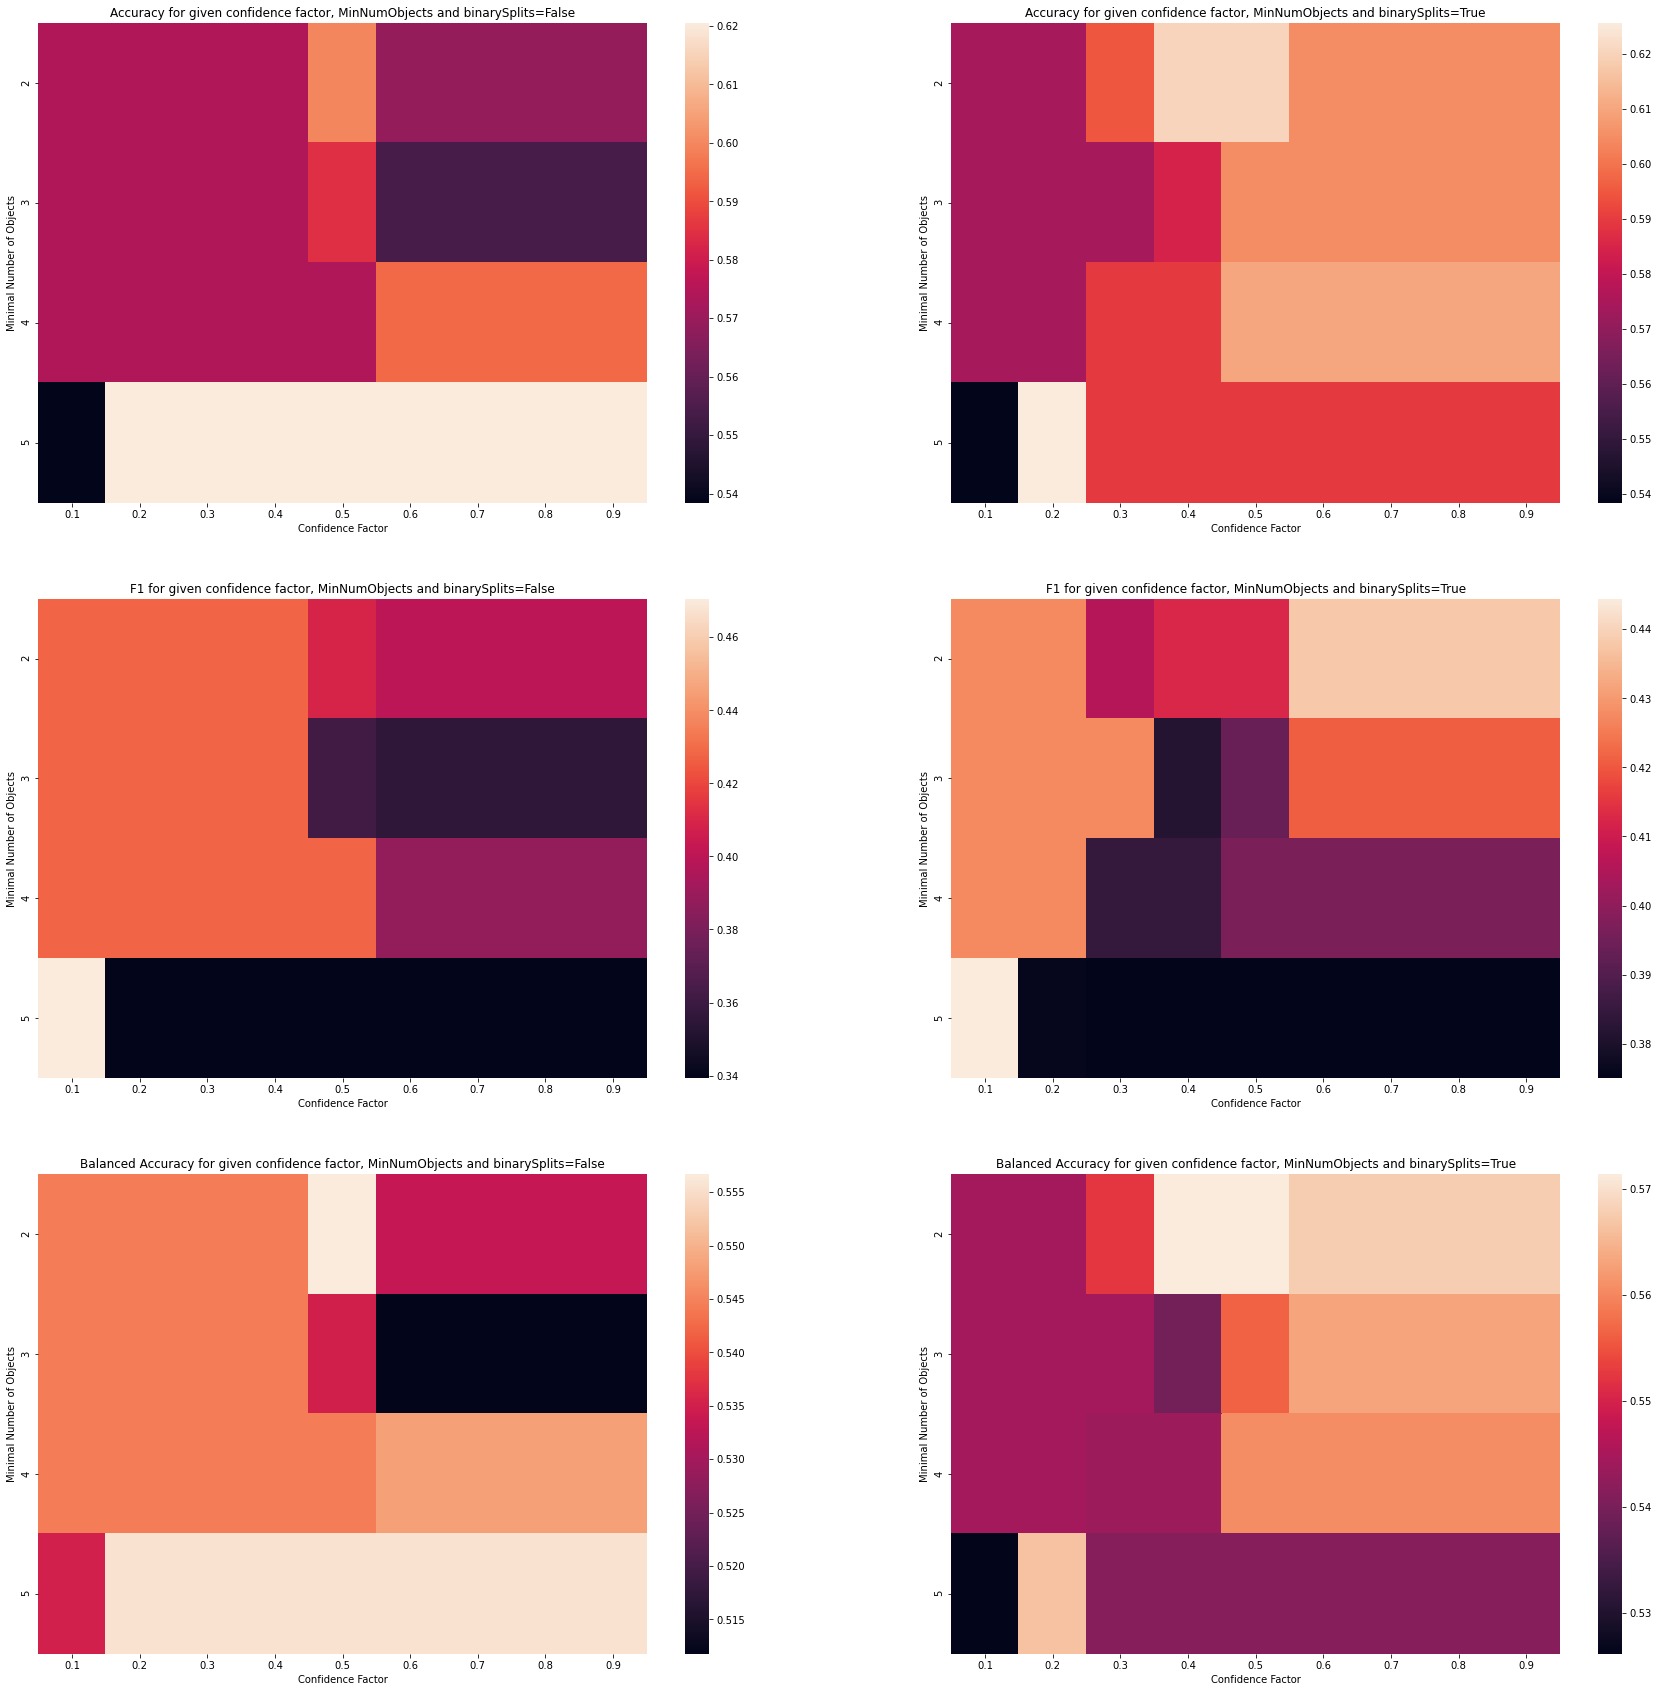

In [19]:
create_six_plots(rs, ['Accuracy', 'F1', 'Balanced Accuracy'])
plt.show()

In [20]:
rs=finalize("student-mat_train.arff", "student-mat_test.arff")

Binary Split & Confidence factor & Minimum objects & TP & FP & FN & TN & Accuracy & F1 & Balanced Accuracy\\ \hline
0 & 0.1000 & 2 & 29 & 48 & 48 & 70 & 0.5077 & 0.3766 & 0.4849\\ \hline
0 & 0.2000 & 2 & 29 & 48 & 48 & 70 & 0.5077 & 0.3766 & 0.4849\\ \hline
0 & 0.3000 & 2 & 29 & 48 & 48 & 70 & 0.5077 & 0.3766 & 0.4849\\ \hline
0 & 0.4000 & 2 & 29 & 49 & 48 & 69 & 0.5026 & 0.3742 & 0.4807\\ \hline
0 & 0.5000 & 2 & 28 & 49 & 49 & 69 & 0.4974 & 0.3636 & 0.4742\\ \hline
0 & 0.6000 & 2 & 28 & 49 & 49 & 69 & 0.4974 & 0.3636 & 0.4742\\ \hline
0 & 0.7000 & 2 & 28 & 49 & 49 & 69 & 0.4974 & 0.3636 & 0.4742\\ \hline
0 & 0.8000 & 2 & 28 & 49 & 49 & 69 & 0.4974 & 0.3636 & 0.4742\\ \hline
0 & 0.9000 & 2 & 28 & 49 & 49 & 69 & 0.4974 & 0.3636 & 0.4742\\ \hline
1 & 0.1000 & 2 & 36 & 41 & 41 & 77 & 0.5795 & 0.4675 & 0.5600\\ \hline
1 & 0.2000 & 2 & 36 & 41 & 41 & 77 & 0.5795 & 0.4675 & 0.5600\\ \hline
1 & 0.3000 & 2 & 37 & 48 & 40 & 70 & 0.5487 & 0.4568 & 0.5369\\ \hline
1 & 0.4000 & 2 & 37 & 48 & 40 & 

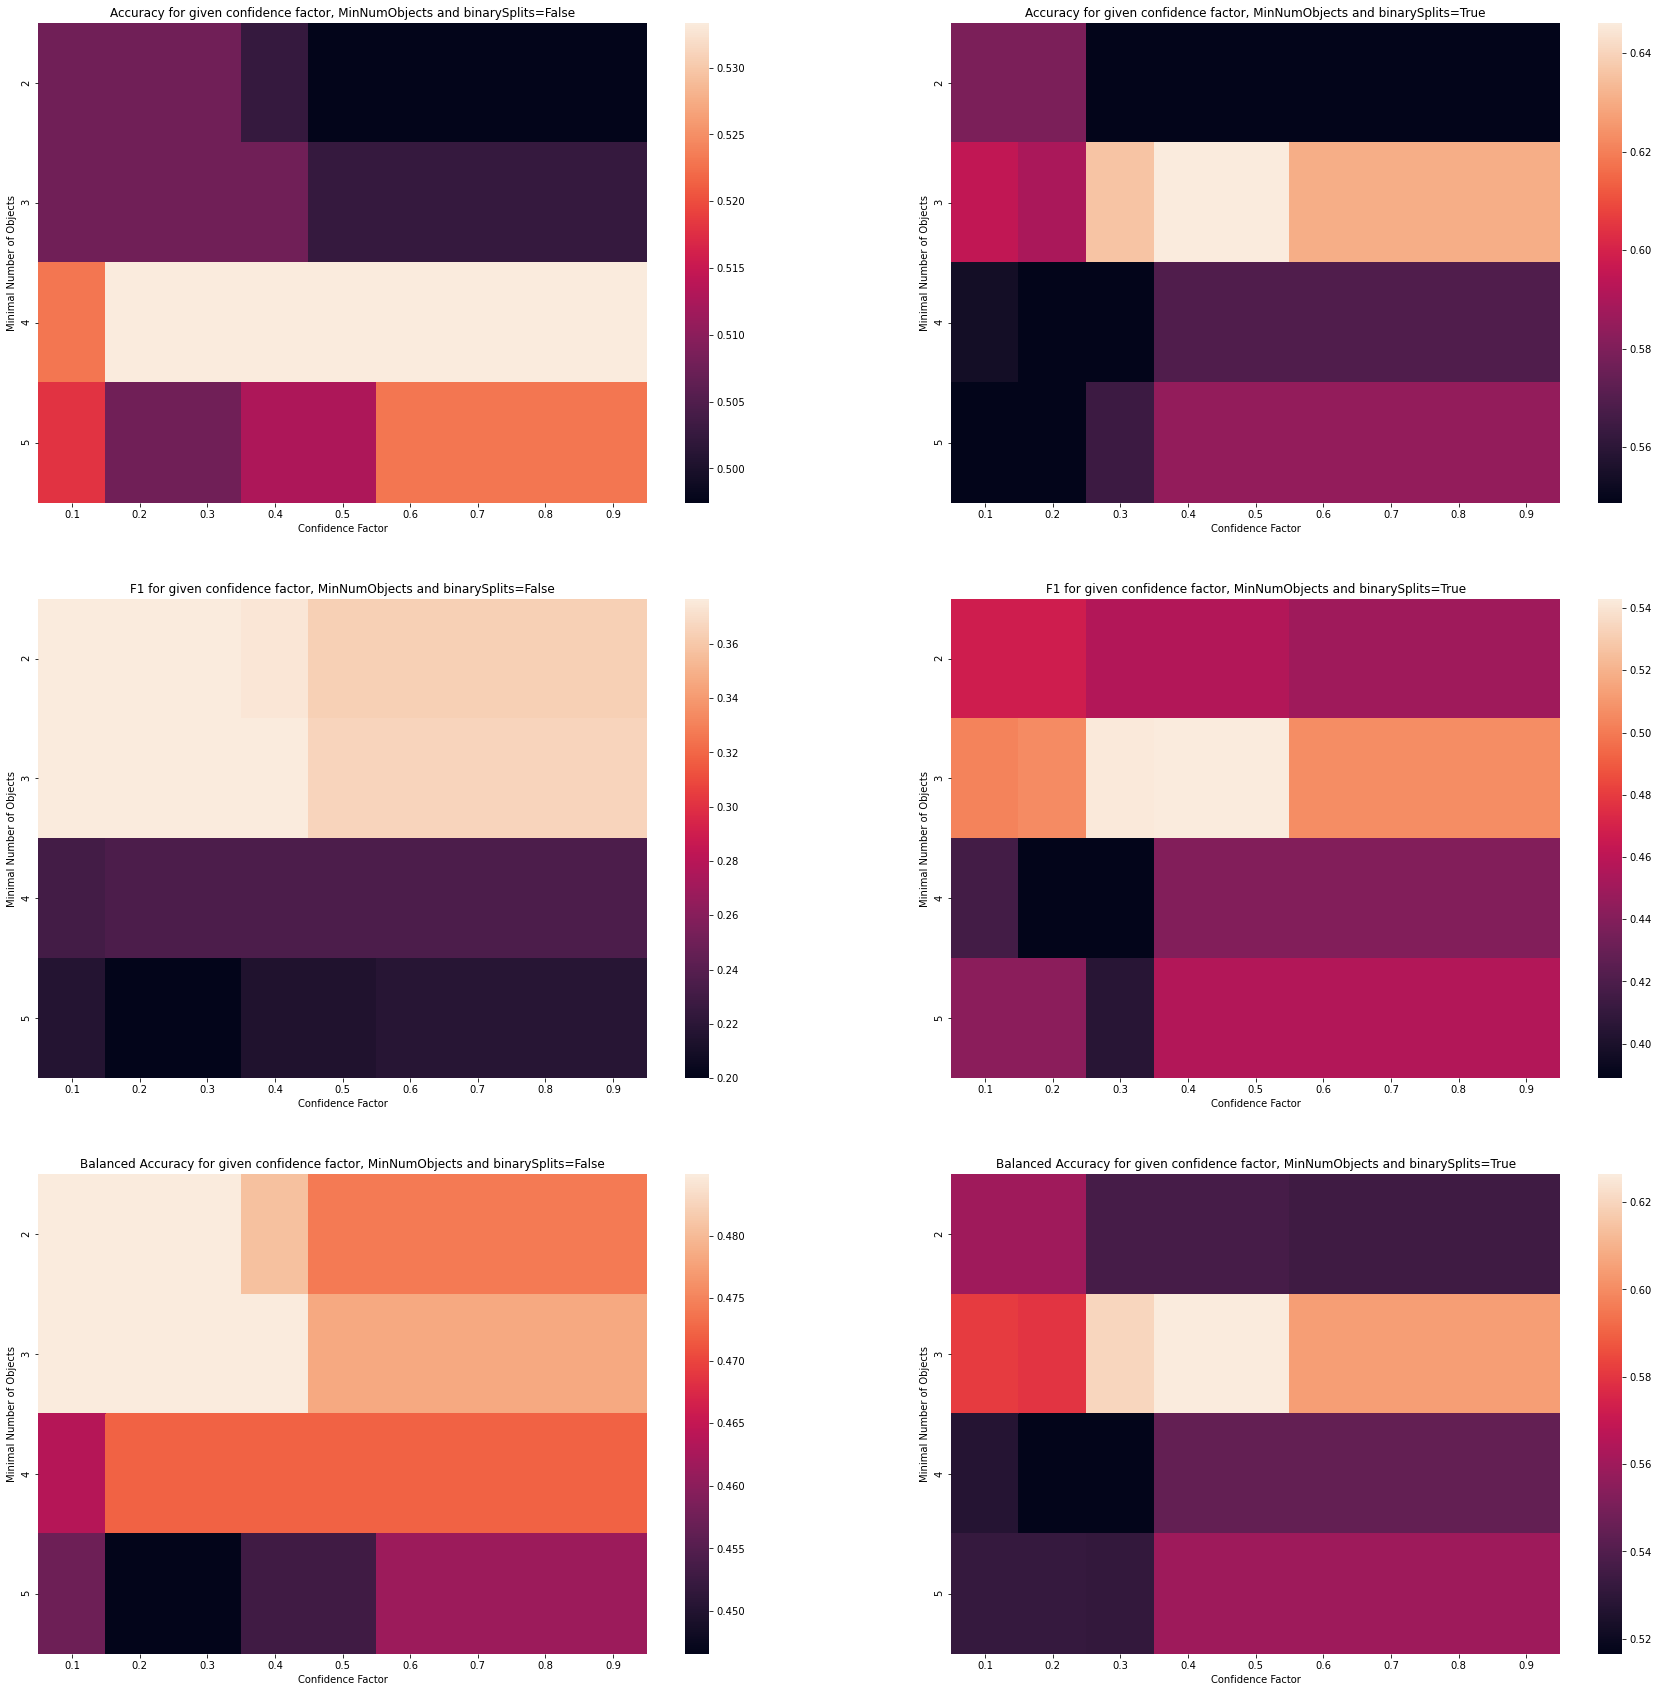

In [24]:
create_six_plots(rs2, ['Accuracy', 'F1', 'Balanced Accuracy'])
plt.show()

In [62]:
rs3=finalize("student-por.arff")

Binary Split & Confidence factor & Minimum objects & TP & FP & FN & TN & Accuracy & F1 & Balanced Accuracy\\ \hline
0 & 0.1000 & 2 & 277 & 134 & 71 & 167 & 0.6841 & 0.7299 & 0.6754\\ \hline
0 & 0.2000 & 2 & 262 & 126 & 86 & 175 & 0.6733 & 0.7120 & 0.6671\\ \hline
0 & 0.3000 & 2 & 256 & 124 & 92 & 177 & 0.6672 & 0.7033 & 0.6618\\ \hline
0 & 0.4000 & 2 & 250 & 123 & 98 & 178 & 0.6595 & 0.6935 & 0.6549\\ \hline
0 & 0.5000 & 2 & 248 & 123 & 100 & 178 & 0.6564 & 0.6898 & 0.6520\\ \hline
0 & 0.6000 & 2 & 239 & 121 & 109 & 180 & 0.6456 & 0.6751 & 0.6424\\ \hline
0 & 0.7000 & 2 & 239 & 121 & 109 & 180 & 0.6456 & 0.6751 & 0.6424\\ \hline
0 & 0.8000 & 2 & 239 & 121 & 109 & 180 & 0.6456 & 0.6751 & 0.6424\\ \hline
0 & 0.9000 & 2 & 239 & 121 & 109 & 180 & 0.6456 & 0.6751 & 0.6424\\ \hline
1 & 0.1000 & 2 & 273 & 125 & 75 & 176 & 0.6918 & 0.7319 & 0.6846\\ \hline
1 & 0.2000 & 2 & 256 & 123 & 92 & 178 & 0.6687 & 0.7043 & 0.6635\\ \hline
1 & 0.3000 & 2 & 248 & 119 & 100 & 182 & 0.6626 & 0.6937 & 0.6586

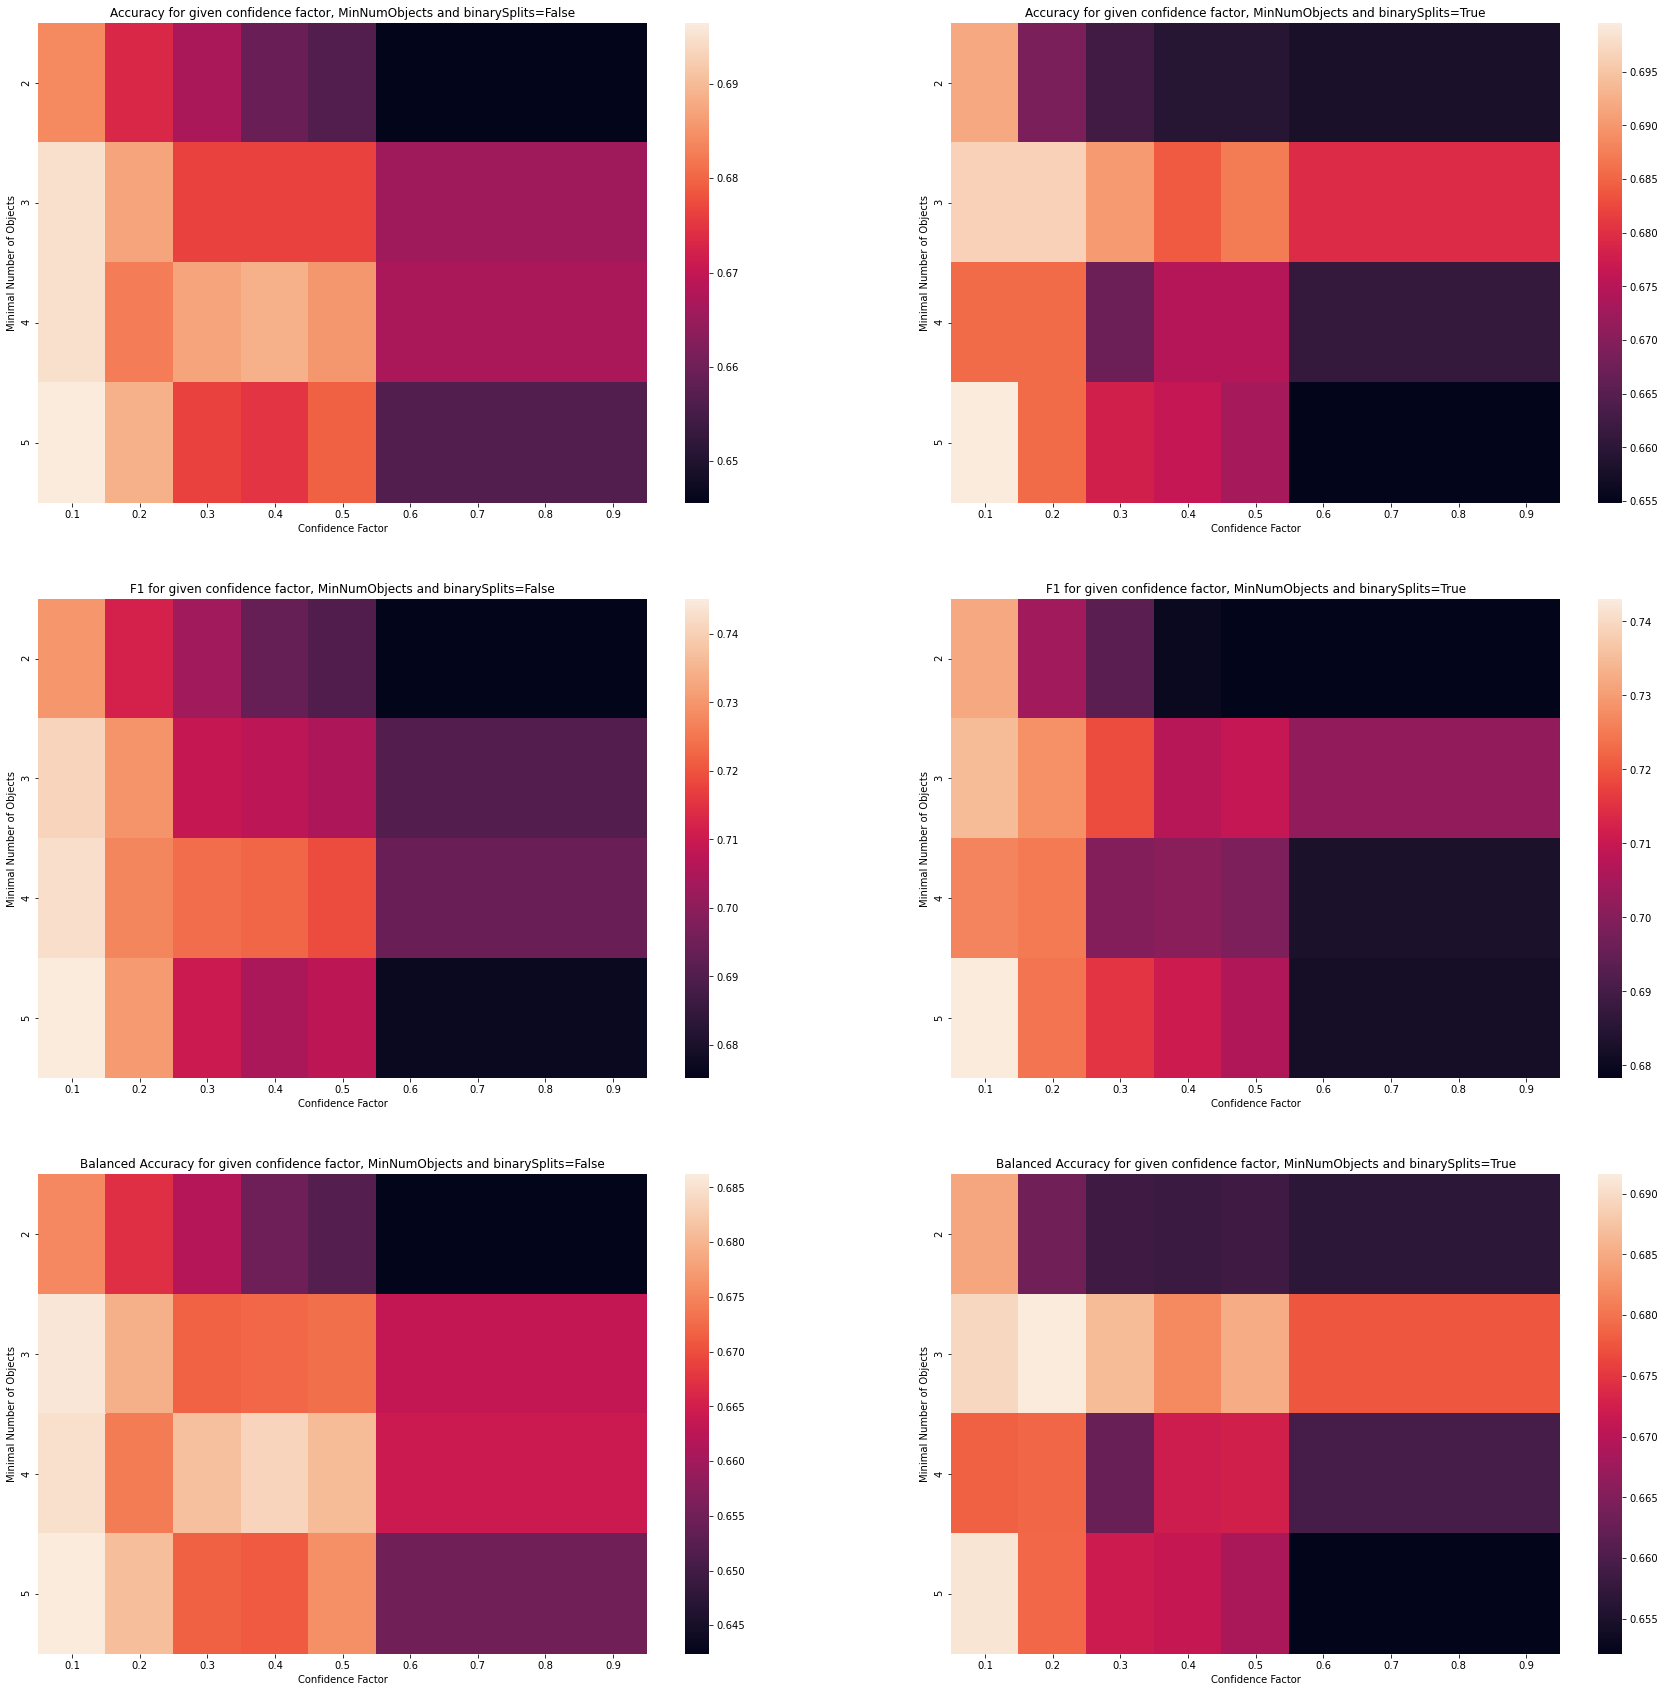

In [64]:
create_six_plots(rs3, ['Accuracy', 'F1', 'Balanced Accuracy'])
plt.show()